In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import warnings

from datetime import datetime, date,timedelta
from matplotlib import gridspec
from matplotlib import cm

from yellowbrick.regressor import PredictionError, ResidualsPlot

warnings.filterwarnings('ignore')
%matplotlib inline

Combine micro-met data and sap flow data

In [2]:
df = pd.read_pickle('df_MetSFEC.pkl')

# Drought

In [3]:
time_start = datetime(2015,9,1,0,0,0)
time_end = datetime(2015,11,1,0,0,0)

In [4]:
df_drought = df.loc[(df['TIMESTAMP'] > time_start) & (df['TIMESTAMP'] < time_end)]

In [5]:
# cols_drop = ['TIMESTAMP_START','TIMESTAMP_END','TIMESTAMP','BATTERY_VOLTAGE',
#              'H2O_1','H2O_2','H2O_3','H2O_4','H2O_5','H2O_6',
#              'RH_2','RH_3','RH_4','RH_5','P_2','RH_6',
#              'WS_4','Rho_PAR','Rho_OIR','NDVI',
#              'PPFD_IN','PPFD_OUT','T_LW_IN','T_LW_OUT','LW_IN','LW_OUT',
#              'PPFD_IN_2','PA']
# cols = ['G', 'SWC_1', 'SWC_2', 'SWC_3', 'SWC_4', 'SWC_5', 'SWC_6', 
#        'TS_1', 'TS_2', 'TS_3', 'TS_4', 'TS_5', 
#        'SW_IN', 'SW_OUT', 'RH_1','NETRAD', 'T_CANOPY', 
#        'TA_1', 'TA_2', 'TA_3', 'TA_4', 'TA_5', 'TA_6', 
#        'WS_1', 'WD_1', 
#        'CO2_1', 'CO2_2', 'CO2_3', 'CO2_4', 'CO2_5', 'CO2_6', 
#        'LW_IN_CORR', 'LW_OUT_CORR', 
#        'SV_OUT_1A']
# cols = ['G', 'SWC_1', 'SWC_2', 'SWC_3', 'SWC_4', 'SWC_5', 'SWC_6', 
#        'TS_1', 'TS_2', 'TS_3', 'TS_4', 'TS_5', 
#        'SW_IN', 'SW_OUT', 'RH_1','NETRAD', 'T_CANOPY', 
#        'TA_1', 'TA_2', 'TA_3', 'TA_4', 'TA_5', 'TA_6', 
#        'WS_1', 
#        'CO2_1', 'CO2_2', 'CO2_3', 'CO2_4', 'CO2_5', 'CO2_6', 
#        'SV_OUT_1A']
# cols = ['G', 'SWC_1', 'SWC_2', 'SWC_3', 'SWC_4', 'SWC_5', 'SWC_6', 
#        'TS_1', 'TS_2', 'TS_3', 'TS_4', 'TS_5',
#         'RH_1','NETRAD', 'T_CANOPY', 
#        'TA_1', 'TA_2', 'TA_3', 'TA_4', 'TA_5', 'TA_6', 
#        'CO2_1', 'CO2_2', 'CO2_3', 'CO2_4', 'CO2_5', 'CO2_6', 
#        'SV_OUT_5A']
# cols = ['G', 'SWC_1', 'SWC_2', 'SWC_3', 'SWC_4', 'SWC_5', 'SWC_6', 
#        'TS_1', 'TS_2', 'TS_3', 'TS_4', 'TS_5',
#         'RH_1','NETRAD', 'T_CANOPY', 
#        'TA_1', 'TA_2', 'TA_3', 'TA_4', 'TA_5', 'TA_6', 
#        'SV_OUT_5A']
cols = ['G', 'SWC_1', 'SWC_2', 'SWC_3', 'SWC_4', 'SWC_5', 'SWC_6', 
       'TS_1', 'TS_2', 'TS_3', 'TS_4', 'TS_5',
        'RH_1','NETRAD', 'T_CANOPY', 
       'TA_1', 'TA_2', 'TA_3', 'TA_4', 'TA_5', 'TA_6',
        'H','LE', 'sonic_temperature', 'air_temperature', 
        'RH', 'VPD', 'Tdew','wind_speed', 'u*', 'SV_OUT_5A'
#         'qc_LE', 'qc_H','Tau', 'qc_Tau', 
#         'co2_flux', 'qc_co2_flux',
#         'h2o_flux', 'qc_h2o_flux', 
#         'H_strg', 'LE_strg', 
#         'sonic_temperature', 'air_temperature', 
#         'air_pressure', 
#         'air_density', 'air_heat_capacity', 'air_molar_volume', 
#         'ET', 
#         'water_vapor_density', 'e', 'es', 'specific_humidity', 
#         'u_unrot', 'v_unrot', 'w_unrot', 
#         'u_rot', 'v_rot', 'w_rot', 
#         'max_wind_speed', 'wind_dir',
#         'TKE', 'L', '(z-d)/L', 'bowen_ratio', 'T*', 'un_Tau', 'Tau_scf',
#         'un_H', 'H_scf', 'un_LE', 'LE_scf', 'un_co2_flux', 'co2_scf', 
#          'un_h2o_flux', 'h2o_scf', 'spikes_hf', 'amplitude_resolution_hf', 
#         'drop_out_hf', 'absolute_limits_hf', 'skewness_kurtosis_hf', 'skewness_kurtosis_sf',
#         'discontinuities_hf', 'discontinuities_sf', 'timelag_hf', 'timelag_sf',
#         'attack_angle_hf', 'non_steady_wind_hf',
#         'u_spikes', 'v_spikes', 'w_spikes', 'ts_spikes', 'co2_spikes', 'h2o_spikes',
#         'u_var', 'v_var', 'w_var', 'ts_var', 'co2_var', 'h2o_var', 'w/ts_cov', 'w/co2_cov', 'w/h2o_cov',
       ]

Assign df for feature selection

In [6]:
df_fs = df[cols].copy()
# df_fs = df_drought[cols].copy()


In [7]:
# print(cols)

In [8]:
# df_fs.isna().sum()

In [9]:
# df_fs['SV_OUT_1A'].plot()

In [10]:
y_list = ['SV_OUT_5A']
cols_x = cols[:-2]
print(cols_x)

['G', 'SWC_1', 'SWC_2', 'SWC_3', 'SWC_4', 'SWC_5', 'SWC_6', 'TS_1', 'TS_2', 'TS_3', 'TS_4', 'TS_5', 'RH_1', 'NETRAD', 'T_CANOPY', 'TA_1', 'TA_2', 'TA_3', 'TA_4', 'TA_5', 'TA_6', 'H', 'LE', 'sonic_temperature', 'air_temperature', 'RH', 'VPD', 'Tdew', 'wind_speed']


In [11]:
# sns.pairplot(df_fs,x_vars = cols,y_vars='SV_OUT_1A')

In [12]:
print(list(df_fs))

['G', 'SWC_1', 'SWC_2', 'SWC_3', 'SWC_4', 'SWC_5', 'SWC_6', 'TS_1', 'TS_2', 'TS_3', 'TS_4', 'TS_5', 'RH_1', 'NETRAD', 'T_CANOPY', 'TA_1', 'TA_2', 'TA_3', 'TA_4', 'TA_5', 'TA_6', 'H', 'LE', 'sonic_temperature', 'air_temperature', 'RH', 'VPD', 'Tdew', 'wind_speed', 'u*', 'SV_OUT_5A']


In [13]:
df_ml = df_fs.dropna(axis = 0,how = 'any')
df_ml.shape

(2868, 31)

In [14]:
print(list(df_ml))

['G', 'SWC_1', 'SWC_2', 'SWC_3', 'SWC_4', 'SWC_5', 'SWC_6', 'TS_1', 'TS_2', 'TS_3', 'TS_4', 'TS_5', 'RH_1', 'NETRAD', 'T_CANOPY', 'TA_1', 'TA_2', 'TA_3', 'TA_4', 'TA_5', 'TA_6', 'H', 'LE', 'sonic_temperature', 'air_temperature', 'RH', 'VPD', 'Tdew', 'wind_speed', 'u*', 'SV_OUT_5A']


# Machine Learning Models

In [15]:
X_org = df_ml.drop(y_list,axis = 1)
y_org = df_ml[y_list]

In [16]:
from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()
y_encoded = lab_enc.fit_transform(y_org)

# Feature Importance

[0.0364526  0.02743613 0.02359268 0.02799647 0.02260575 0.0280218
 0.02424982 0.03372336 0.03146393 0.03587436 0.03664092 0.03910374
 0.03434839 0.0417929  0.03262962 0.03470827 0.03199576 0.0304684
 0.03048842 0.03282141 0.03369474 0.03924409 0.03860372 0.03429262
 0.03203117 0.03319457 0.02974029 0.03650053 0.0421739  0.04410963]


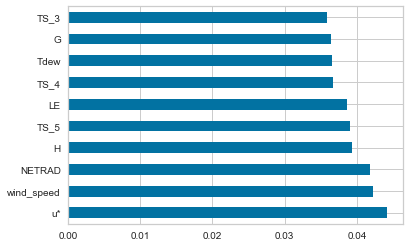

Feature ranking:
1. feature 29 (0.044110)
2. feature 28 (0.042174)
3. feature 13 (0.041793)
4. feature 21 (0.039244)
5. feature 11 (0.039104)
6. feature 22 (0.038604)
7. feature 10 (0.036641)
8. feature 27 (0.036501)
9. feature 0 (0.036453)
10. feature 9 (0.035874)
11. feature 15 (0.034708)
12. feature 12 (0.034348)
13. feature 23 (0.034293)
14. feature 7 (0.033723)
15. feature 20 (0.033695)
16. feature 25 (0.033195)
17. feature 19 (0.032821)
18. feature 14 (0.032630)
19. feature 24 (0.032031)
20. feature 16 (0.031996)
21. feature 8 (0.031464)
22. feature 18 (0.030488)
23. feature 17 (0.030468)
24. feature 26 (0.029740)
25. feature 5 (0.028022)
26. feature 3 (0.027996)
27. feature 1 (0.027436)
28. feature 6 (0.024250)
29. feature 2 (0.023593)
30. feature 4 (0.022606)


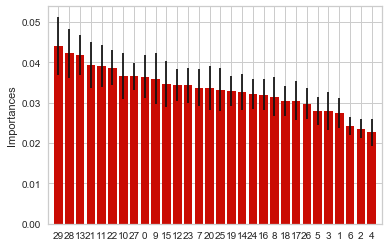

In [17]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
forest = RandomForestClassifier()
forest.fit(X_org,y_encoded)
print(forest.feature_importances_)
feat_importances = pd.Series(forest.feature_importances_, index=X_org.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_org.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
# plt.title("Feature importances")
plt.bar(range(X_org.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_org.shape[1]), indices)
plt.xlim([-1, X_org.shape[1]])
plt.ylabel("Importances")
plt.show()

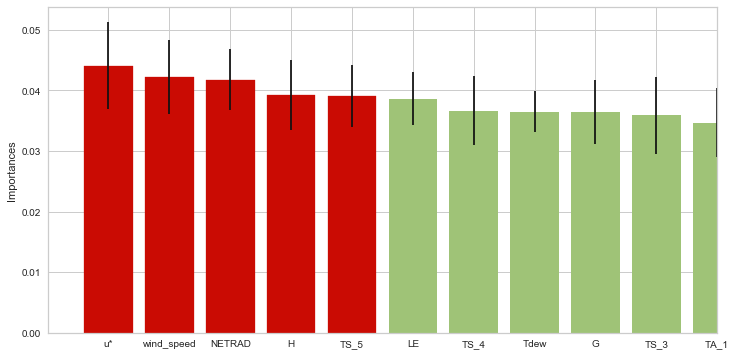

In [20]:
# Plot the feature importances of the forest
plt.figure(figsize = (12,6))
# plt.title("ET Feature importances")
barlist = plt.bar(range(X_org.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
for i in range(5):
    barlist[i].set_color('r')
for i in range(6):
    barlist[-(i+1)].set_color('b')
plt.xticks(range(X_org.shape[1]), X_org.columns[indices])
plt.xlim([-1, X_org.shape[1]-20])
plt.ylabel("Importances")
plt.show()

# Feature Selection

Model-based Feature Selection

In [38]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import SelectFromModel
# X.shape

clf = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,max_depth=1, random_state=0, loss='ls')
clf = clf.fit(X_org, y_org)
clf.feature_importances_  

model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X_org)
y_new = y_org
# X_new.shape   

cols = model.get_support(indices=True)
# Create new dataframe with only desired columns, or overwrite existing
new_features = X_org.columns[cols]
print(list(new_features))

['NETRAD', 'T_CANOPY']


In [142]:
# # Feature Selection
# # Automatic Fearture Selection
# from sklearn.feature_selection import SelectPercentile
# rng = np.random.RandomState(42)
# noise_train = rng.normal(size=(len(X_train_prefs), 50))
# X_train_noise = np.hstack([X_train_prefs, noise_train])
# noise_test = rng.normal(size=(len(X_test_prefs), 50))
# X_test_noise = np.hstack([X_test_prefs, noise_test])

# select = SelectPercentile(percentile=10)
# select.fit(X_train_noise, y_train)

# # transform training set
# X_train1 = select.transform(X_train_noise)
# # transform test data
# X_test1 = select.transform(X_test_noise)

# print("X_train.shape: {}".format(X_train_noise.shape))
# print("X_train_selected.shape: {}".format(X_train1.shape))

X_train.shape: (5852, 77)
X_train_selected.shape: (5852, 8)


Split train and test data

Assign datasets for ML models

In [65]:
X = X_org
y = y_org

In [66]:
# Split train and test data
from sklearn.model_selection import train_test_split
X_train_pre, X_test_pre, y_train, y_test = train_test_split(X, y)

In [67]:
# Preprocessing & Normalization
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_pre)
# Train and Test data before feature selection
X_train_prefs = scaler.transform(X_train_pre)
X_test_prefs = scaler.transform(X_test_pre)

Train and Test Data

In [68]:
X_train = X_train_prefs
X_test = X_test_prefs

# Simple ML Regressors

k-neighbors regression

YellowbrickValueError: y must be a (1,) dimensional array not (1887, 1)

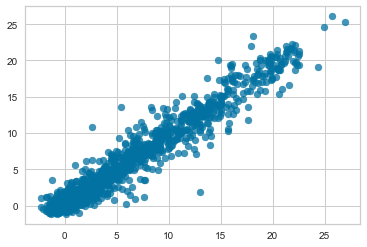

In [75]:
# k-neighbors regression
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=6)

visualizer1 = PredictionError(knr)
visualizer1.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer1.score(X_test, y_test)  # Evaluate the model on the test data
visualizer1.show()   

ValueError: color kwarg must have one color per data set. 5660 data sets and 1 colors were provided

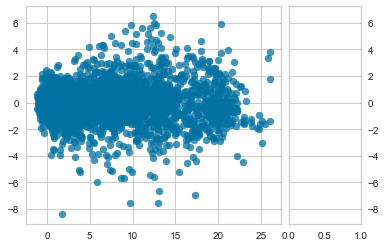

In [70]:
visualizer2 = ResidualsPlot(knr)
visualizer2.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer2.score(X_test, y_test)  # Evaluate the model on the test data
visualizer2.show()

Linear Regression

YellowbrickValueError: y must be a (1,) dimensional array not (1887, 1)

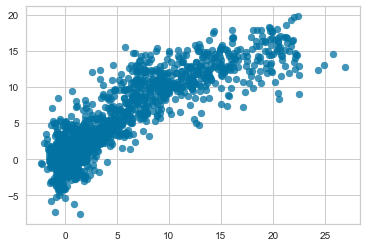

In [71]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

visualizer1 = PredictionError(lr)
visualizer1.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer1.score(X_test, y_test)  # Evaluate the model on the test data
visualizer1.show()   

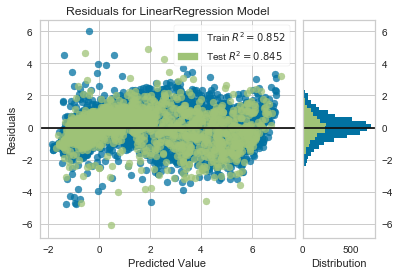

In [154]:
visualizer2 = ResidualsPlot(lr)
visualizer2.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer2.score(X_test, y_test)  # Evaluate the model on the test data
visualizer2.show()

Ridge Regression

YellowbrickValueError: y must be a (1,) dimensional array not (1887, 1)

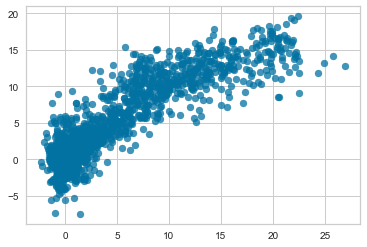

In [72]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha = 5)

visualizer1 = PredictionError(rr)
visualizer1.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer1.score(X_test, y_test)  # Evaluate the model on the test data
visualizer1.show()  

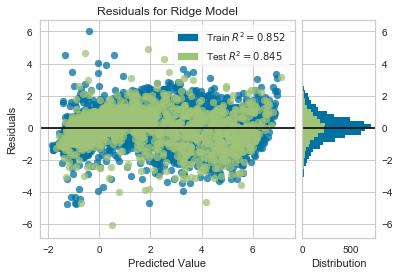

In [156]:
visualizer2 = ResidualsPlot(rr)
visualizer2.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer2.score(X_test, y_test)  # Evaluate the model on the test data
visualizer2.show()

Lasso

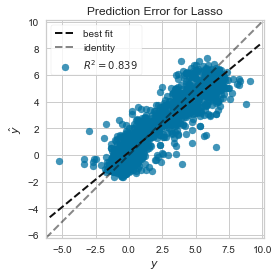

In [157]:
from sklearn.linear_model import Lasso
lsr = Lasso(alpha = 0.01, max_iter=10000)
visualizer1 = PredictionError(lsr)
visualizer1.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer1.score(X_test, y_test)  # Evaluate the model on the test data
visualizer1.show()  

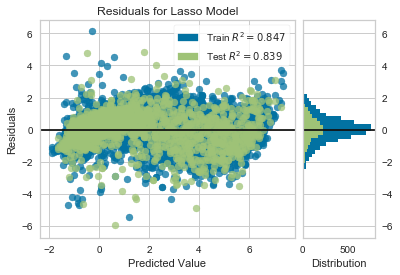

In [158]:
visualizer2 = ResidualsPlot(lsr)
visualizer2.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer2.score(X_test, y_test)  # Evaluate the model on the test data
visualizer2.show()

Decision Tree

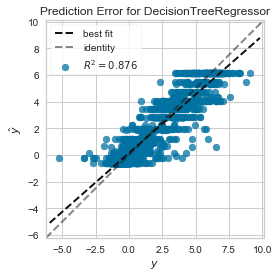

In [159]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth = 5)

visualizer1 = PredictionError(dtr)
visualizer1.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer1.score(X_test, y_test)  # Evaluate the model on the test data
visualizer1.show()

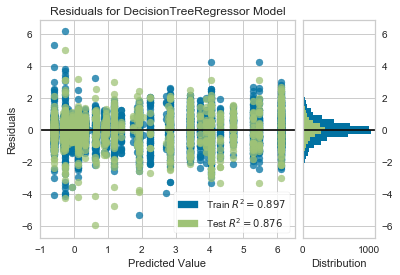

In [160]:
visualizer2 = ResidualsPlot(dtr)
visualizer2.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer2.score(X_test, y_test)  # Evaluate the model on the test data
visualizer2.show()

Random Forest

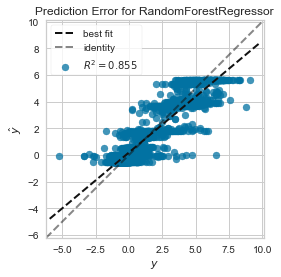

In [161]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=3, random_state=0,n_estimators=1000)

visualizer1 = PredictionError(rfr)
visualizer1.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer1.score(X_test, y_test)  # Evaluate the model on the test data
visualizer1.show()  

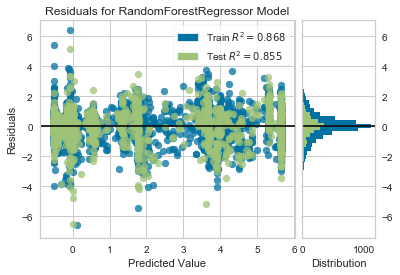

In [162]:
visualizer2 = ResidualsPlot(rfr)
visualizer2.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer2.score(X_test, y_test)  # Evaluate the model on the test data
visualizer2.show()

Support Vector Machines

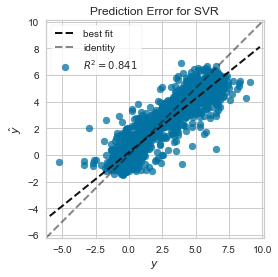

In [163]:
from sklearn.svm import SVR
# svmr = SVR(gamma = 'scale',C = 1.0, epsilon = 0.2)
svmr = SVR(kernel='linear', gamma='auto')

visualizer1 = PredictionError(svmr)
visualizer1.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer1.score(X_test, y_test)  # Evaluate the model on the test data
visualizer1.show()  

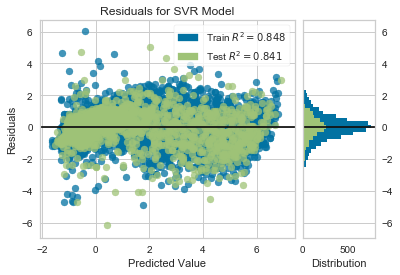

In [164]:
visualizer2 = ResidualsPlot(svmr)
visualizer2.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer2.score(X_test, y_test)  # Evaluate the model on the test data
visualizer2.show()

Stochastic gradient descent regressor

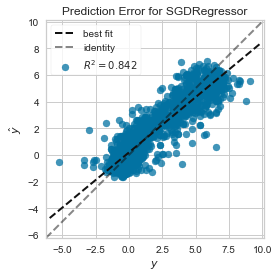

In [165]:
from sklearn import linear_model
sgdr = linear_model.SGDRegressor(max_iter=1000, tol=1e-3)

visualizer1 = PredictionError(sgdr)
visualizer1.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer1.score(X_test, y_test)  # Evaluate the model on the test data
visualizer1.show()  

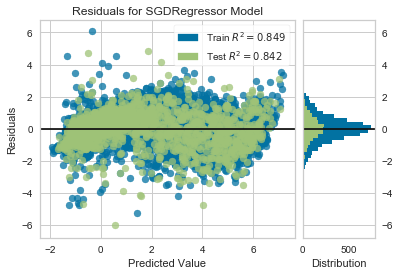

In [166]:
visualizer2 = ResidualsPlot(sgdr)
visualizer2.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer2.score(X_test, y_test)  # Evaluate the model on the test data
visualizer2.show()

Shallow Neural Networks

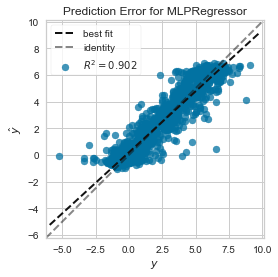

In [167]:
# Shallow Neural Networks
from sklearn.neural_network import MLPRegressor
mlpr = MLPRegressor()

visualizer1 = PredictionError(mlpr)
visualizer1.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer1.score(X_test, y_test)  # Evaluate the model on the test data
visualizer1.show()  

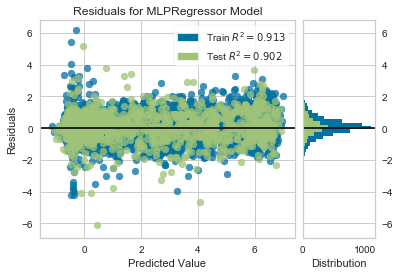

In [168]:
visualizer2 = ResidualsPlot(mlpr)
visualizer2.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer2.score(X_test, y_test)  # Evaluate the model on the test data
visualizer2.show()